In [1]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

# <center>Data analysis of the Titanic with the use of the classification.</center> #
#### <center>10.12.2019</center> ####

### <center>Introduction</center> ###

<p style="text-indent: 25px;">Titanic analysis is a classic example of the use of machine learning (ML). With ML, you can predict whether a given passenger will survive or not, depending on the characteristics that are inherent in this passenger.</p>
<p style="text-indent: 25px;">The data obtained from <a href="https://www.kaggle.com/c/titanic/data"> $Kaggle$ </a> will be used for the analysis.</p>
<p style="text-indent: 25px;">The data is divided into training and test samples.</p>
<p style="text-indent: 25px;">The analysis will use such types ML as: Decision Tree; Boosting, Principal component method and Single layer perceptron.</p>

In [2]:
# connecting packeges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# decision tree packeges
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz 
# boosting
import xgboost
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [3]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load data
# surviving passengers by id
gender_submission = pd.read_csv('https://raw.githubusercontent.com/Aurilino/Kaggle/master/Titanic/gender_submission.csv')
# train data
train = pd.read_csv('https://raw.githubusercontent.com/Aurilino/Kaggle/master/Titanic/train.csv')
# test data
test = pd.read_csv('https://raw.githubusercontent.com/Aurilino/Kaggle/master/Titanic/test.csv')

### Let's Looking to data

In [5]:
print('gender_submission')
gender_submission.head()
print('Train data')
train.head()
print('Test data')
test.head()

gender_submission


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Train data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Test data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### <center>Decision tree</center> ###
<p style="text-indent: 25px;">A decision tree is a classifier using a visual and analytical decision support tool where the expected values (or expected utility) of competing alternatives are calculated. The decision tree consists of three types of nodes:</p>

- The nodes of the decision
- Probabilistic nodes
- Closing nodes

<p style="text-indent: 25px;">Let's prepare the data for the decision tree: first, replace the "gender" fields from the string with an integer, and replace the passenger boarding place with the vessel (C-Cherbourg, S-Southampton, Q = Queenstown), remove the passenger name, and replace the empty age values with the average values. Also, it should be noted that the cabin number depends on the class of the passenger, so to avoid codependency it is necessary to delete the cabin number and the passenger ticket.</p>

<p style="text-indent: 25px;">Remove the columns with the name, cabin number andthe passenger ticket data. And replace the passenger boarding point.</p>

In [6]:
# remove the passenger's name
del train['Name']
del test['Name']
del train['Cabin']
del test['Cabin']
del train['Ticket']
del test['Ticket']

In [7]:
# Let's look at the number of NaN values in the columns
print('Train data')
train.isnull().sum()
print('Test data')
test.isnull().sum()

Train data


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Test data


PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [8]:
# replace empty values with averages
train = train.fillna({'Age':train.Age.median()})
test = test.fillna({'Age':test.Age.median()})
# drop all anither NaN values
train.dropna(inplace=True)
test.dropna(inplace=True)

In [9]:
train.Embarked = train.Embarked.replace({'S':'Southampton', 'C':'Cherbourg',  'Q':'Queenstown'})
test.Embarked = test.Embarked.replace({'S':'Southampton', 'C':'Cherbourg',  'Q':'Queenstown'})

In [10]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [11]:
# Look at ready data
print('gender_submission')
gender_submission.head()
print('Train data')
train.head()
print('Test data')
test.head()

gender_submission


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Train data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


Test data


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


Remove the passenger number and split the sample into training and target data.

In [12]:
X = train.drop(['PassengerId','Survived'], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
Y = train.Survived

<p style="text-indent: 25px;">Create decision tree. When using the decision tree, it is possible to retrain the model. to avoid this, we will select the optimal parameters of the decision tree.</p>

In [14]:
clf = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth':range(1, 100)}
grid_search_cv_clf = GridSearchCV(DecisionTreeClassifier(), parametrs, iid=True, cv=5)
best_params = grid_search_cv_clf.fit(X, Y)
best_criterion = best_params.best_params_['criterion']
best_depth = best_params.best_params_['max_depth']
print('Best criterion:', best_criterion)
print('Best depth of the tree:', best_depth)

Best criterion: entropy
Best depth of the tree: 9


<p style="text-indent: 25px;">Let's look at what facts affect whether the passenger will survive or not.</p>

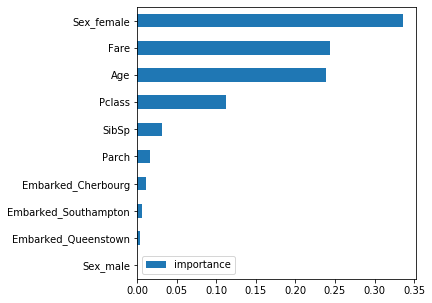

In [15]:
clf = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_depth)
imp_tree = pd.DataFrame(clf.fit(X, Y).feature_importances_, 
              index=X.columns, columns=['importance'])
ax = imp_tree.sort_values('importance').plot(kind='barh', figsize=(5, 5))

<p style="text-indent: 25px;">Let's test our model on test data.</p>
<p style="text-indent: 25px;">Let's test our model on test data.</p>

In [16]:
best_clf = grid_search_cv_clf.fit(X, Y).best_estimator_
X_test = test.merge(gender_submission, how='left', left_on='PassengerId', right_on='PassengerId').drop(['PassengerId','Survived'], axis=1)
Y_test = test.merge(gender_submission, how='left', left_on='PassengerId', right_on='PassengerId').Survived
res_tree = best_clf.score(X_test, Y_test)
print('Percentage of correctly predicted passengers who survived %.2f%%:' % (round(res_tree*100, 2)))

Percentage of correctly predicted passengers who survived 87.29%:


<p style="text-indent: 25px;">The de tree does a good job of predicting the Titanic passenger's survival.</p>
<p style="text-indent: 25px;">The main factor of survival is: female sex, cabin class, ticket price, age, as well as the presence of brothers or sisters on the ship.</p>

### <center>Boosting</center> ###
<p style="text-indent: 25px;">Boosting is an improved decision tree using gradient boosting.</p> 

Improvements:

- Regularization: to reduce the overfitting of the model;
- Working with sparse data: filling missing values depending on the loss value;
- Weighted quantile Method: finds optimal separation points most efficiently;
- Cross-validation.

<p style="text-indent: 25px;">For boosting, we use the XGBoost module for python.</p> 

In [17]:
xmodel = xgboost.XGBClassifier()
xmodel.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

<p style="text-indent: 25px;">Let's see how the factors allocated by The XGBoost module are distributed.</p> 

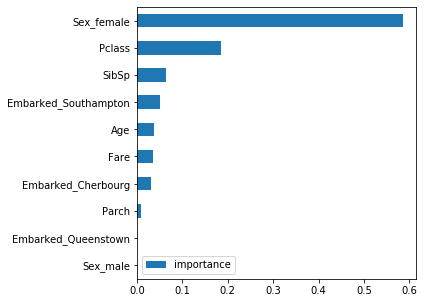

In [18]:
imp_xgb = pd.DataFrame(xmodel.feature_importances_, 
              index=X.columns, columns=['importance'])
ax = imp_xgb.sort_values('importance').plot(kind='barh', figsize=(5, 5))

<p style="text-indent: 25px;">The boosting method uses more factors to build the model.</p> 

In [19]:
predictions = [round(value) for value in xmodel.predict(X_test)]

In [20]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.69%


<p style="text-indent: 25px;">The method of boosting showed a better, though slightly better result than the usual decision tree..</p> 

### <center>Principal component method</center> ###
<p style="text-indent: 25px;">By the method of principal components is a transformation of the data to find variables which highly correlated factors of the sample. After finding these variables, you can use them to build a prediction model.By the method of principal components is a transformation of the data to find variables which highly correlated factors of the sample. After finding these variables, you can use them to build a prediction model. The search is carried out by explaining the maximum variance.</p> 
<p style="text-indent: 25px;">For the principal component method, you first need to unify the data relative to each other.</p> 
<p style="text-indent: 25px;">Use PCA for predict survival of the passengers.</p>

In [21]:
sc = StandardScaler() 

pca_train = sc.fit_transform(X) 
pca_test = sc.transform(X_test) 

In [22]:
pca = PCA(n_components = 2) 
 
pca_train = pca.fit_transform(pca_train) 
pca_test = pca.transform(pca_test) 
 
explained_variance = pca.explained_variance_ratio_ 

<p style="text-indent: 25px;">Let's construct a logical regression using PCA.</p>

In [23]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(pca_train, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred = classifier.predict(pca_test) 

In [25]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.69%


<p style="text-indent: 25px;">PCA showed even better result than decision tree and boosting.</p> 

### <center>Single layer perceptron</center> ###
<p style="text-indent: 25px;">A single-layer perceptron is a model that consists of: a neuron that is a sum with a given offset of weights of incoming vectors and an activation function.</p> 
<img src='https://im0-tub-ru.yandex.net/i?id=518207d565d0df119682d4a5d346b1a1&n=13&exp=1'>

##### <center>Single layer perceptron example: <a href="https://im0-tub-ru.yandex.net/i?id=518207d565d0df119682d4a5d346b1a1&n=13&exp=1"> $Source$ </a> </center> #####

<p style="text-indent: 25px;">When creating a single-layer perceptron, you must specify the number of incoming nodes (this is the number of incoming factors), the offset (in this case, the learning rate), and the number of epochs (training cycles).</p>
<p style="text-indent: 25px;">Let's create a class for perceptron.</p>

In [26]:
class Perceptron():
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        self.weight = np.zeros(1 + X.shape[1])
        self.errors = []

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):

        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<p style="text-indent: 25px;">Let's train the perceptron on the training data.</p>

In [27]:
pn = Perceptron(0.1, niter=100)
pn.fit(np.array(X), np.array(Y))

<p style="text-indent: 25px;">Let's look at the change of errors with each era.</p>

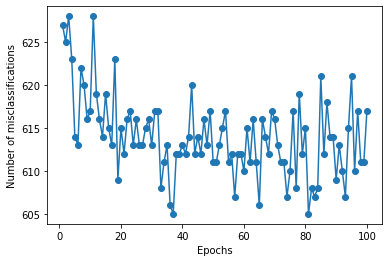

In [28]:
ax = plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Number of misclassifications')
ax = plt.show()
ax

<p style="text-indent: 25px;">As you can see, the minimum error value occurs 2 times at 38 and 81 epochs.</p>

In [29]:
y_pred = pn.predict(np.array(X_test)) 
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 36.21%


<p style="text-indent: 25px;">Perceptron shows a low result in comparison with other presented classifiers.</p>

### <center>Summary:</center> ###

<p style="text-indent: 25px;">Among all the presented methods of classification, logical regression with the method of principal components proved to be the best. Boosting and decision tree also performed well. While the perceptron has shown itself bad. So the principal components method showed $94%$ prediction accuracy, boosting $\approx 90%$, decision tree showed $87%$ and perceptron showed $36%$. This is probably due to the fact that in the sample there are problems with which the perceptron does not cope well, for example, the exclusive or (XOR).</p>